In [14]:
"""Simulation of the impact of differential privacy on a block that has
N people all the same age (22)."""

BLOCK_AGE=20
MAX_AGE=110
NUM_TRIALS=10000
TRIALS='trials'
PRIVATIZED_AVERAGE_AGE='privatized_average_age'
PRIVATIZED_AVERAGE_AGES='privatized_average_ages'
PRIVATIZED_COUNT='privatized_count'
PRIVATIZED_COUNTS='privatized_counts'

EPSILON='ε'
NPEOPLE='npeople'
PERCENTILES=[5, 25, 50, 75, 95]
import numpy as np
import matplotlib.pyplot as plot


In [15]:
def privitize_block(epsilon, npeople):
    """Given a block of npeople all the same age, return the private value of
    (averageAge, count)
    """
    hist = np.resize(0,MAX_AGE)
    hist[BLOCK_AGE] = npeople
    private_hist = hist + np.random.laplace(loc=0,
                                            scale=np.resize(1/epsilon,MAX_AGE))
    private_count = private_hist.sum()
    private_average_age = (private_hist * np.arange(MAX_AGE)).sum() / private_count
    return {PRIVATIZED_COUNT:private_count,
            PRIVATIZED_AVERAGE_AGE:private_average_age}


In [16]:
def run_experiment(epsilon, npeople, num_trials=NUM_TRIALS):
    """Repeatedly run the experiment and report back the average ages and average counts."""
    runs = [privitize_block(epsilon, npeople) for i in range(num_trials)]
    private_counts         = np.array([o[PRIVATIZED_COUNT] for o in runs])
    private_average_ages   = np.array([o[PRIVATIZED_AVERAGE_AGE] for o in runs])
    return {EPSILON:epsilon,
            NPEOPLE:npeople,
            TRIALS:NUM_TRIALS,
            PRIVATIZED_COUNTS:private_counts,
            PRIVATIZED_AVERAGE_AGES:private_average_ages}

In [17]:
demo = run_experiment(1.0,1, num_trials=10_000)

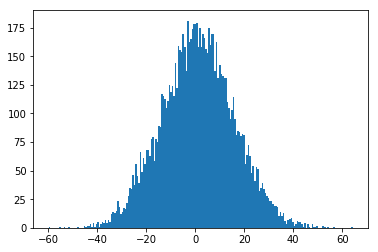

In [18]:
plot.hist(demo[PRIVATIZED_COUNTS],bins=200)
plot.show()

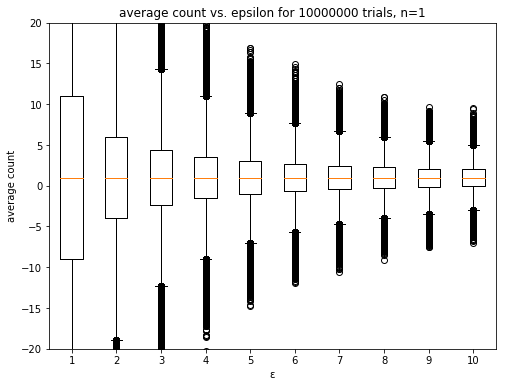

In [19]:
data = []
labels = []
for epsilon in range(1,11,1):
    labels.append(str(epsilon))
    expdata = run_experiment(epsilon, npeople=1, num_trials=10_000_000)
#    data.append( expdata[PRIVATIZED_AVERAGE_AGES])
    data.append( expdata[PRIVATIZED_COUNTS])

fig, ax = plot.subplots()
fig.set_size_inches(8,6)
#ax.set_title(f"average age distribution vs. epsilon for {NUM_TRIALS} trials, n=1")
ax.set_title(f"average count vs. epsilon for {len(data[0])} trials, n=1")
ax.boxplot(labels=labels, x=data);
ax.set_ylim(-20,20)
ax.set_ylabel("average count")
ax.set_xlabel(EPSILON)
plot.show()

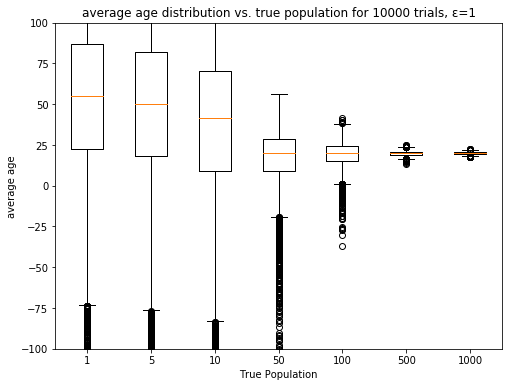

In [152]:
data = []
labels = []
epsilon = 1
num_trials = 10_000_000
for npeople in [1,5,10,50,100,500,1000]:
    labels.append(str(npeople))
    expdata = run_experiment(epsilon, npeople=npeople, num_trials=num_trials)
    data.append( expdata[PRIVATIZED_AVERAGE_AGES])

fig, ax = plot.subplots()
fig.set_size_inches(8,6)
ax.set_title(f"average age distribution vs. true population for {num_trials:,} trials, ε={epsilon}")
ax.boxplot(labels=labels, x=data);
ax.set_ylim(-100,100)
ax.set_ylabel("average age")
ax.set_xlabel("True Population")
plot.show()